In [3]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import cufflinks as cf

In [2]:
!pip install cufflinks

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
  Created wheel for cufflinks: filename=cufflinks-0.17.3-py3-none-any.whl size=68734 sha256=0ee855da334f2fff7b45f012ced97652c81842e14fcc3c082972dc05e9a03a9f
  Stored in directory: c:\users\administrator\appdata\local\pip\cache\wheels\86\b8\fe\c3f16fef5b6ae2d0b2f7ddd14834f60e592474bb2e39d6227b
Successfully built cufflinks


In [4]:
data = pd.read_csv('./电子产品销售分析.csv')

In [5]:
data

,Unnamed: 0,event_time,order_id,product_id,category_id,category_code,brand,price,user_id,age,sex,local
0,0,2020-04-24 11:50:39 UTC,2294359932054536986,1515966223509089906,2.268105e+18,electronics.tablet,samsung,162.01,1.515916e+18,24.0,女,海南
1,1,2020-04-24 11:50:39 UTC,2294359932054536986,1515966223509089906,2.268105e+18,electronics.tablet,samsung,162.01,1.515916e+18,24.0,女,海南
2,2,2020-04-24 14:37:43 UTC,2294444024058086220,2273948319057183658,2.268105e+18,electronics.audio.headphone,huawei,77.52,1.515916e+18,38.0,女,北京
3,3,2020-04-24 14:37:43 UTC,2294444024058086220,2273948319057183658,2.268105e+18,electronics.audio.headphone,huawei,77.52,1.515916e+18,38.0,女,北京
4,4,2020-04-24 19:16:21 UTC,2294584263154074236,2273948316817424439,2.268105e+18,NaN,karcher,217.57,1.515916e+18,32.0,女,广东
...,...,...,...,...,...,...,...,...,...,...,...,...
564164,2633516,2020-11-21 10:10:01 UTC,2388440981134693942,1515966223526602848,2.268105e+18,electronics.smartphone,oppo,138.87,1.515916e+18,21.0,男,上海
564165,2633517,2020-11-21 10:10:13 UTC,2388440981134693943,1515966223509089282,2.268105e+18,electronics.smartphone,apple,418.96,1.515916e+18,21.0,女,北京
564166,2633518,2020-11-21 10:10:30 UTC,2388440981134693944,1515966223509089917,2.268105e+18,appliances.personal.scales,vitek,12.48,1.515916e+18,19.0,女,上海
564167,2633519,2020-11-21 10:10:30 UTC,2388440981134693944,2273948184839454837,2.268105e+18,NaN,moulinex,41.64,1.515916e+18,19.0,女,上海


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 564169 entries, 0 to 564168
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Unnamed: 0     564169 non-null  int64  
 1   event_time     564169 non-null  object 
 2   order_id       564169 non-null  int64  
 3   product_id     564169 non-null  int64  
 4   category_id    564169 non-null  float64
 5   category_code  434799 non-null  object 
 6   brand          536945 non-null  object 
 7   price          564169 non-null  float64
 8   user_id        564169 non-null  float64
 9   age            564169 non-null  float64
 10  sex            564169 non-null  object 
 11  local          564169 non-null  object 
dtypes: float64(4), int64(3), object(5)
memory usage: 51.7+ MB


In [7]:
data['event_time'] = pd.to_datetime(data['event_time'])

In [10]:
data['event_dates'] = data['event_time'].dt.date.astype('datetime64[ns]')
data['event_month'] = data['event_time'].dt.date.astype('datetime64[M]')

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 564169 entries, 0 to 564168
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype              
---  ------         --------------   -----              
 0   Unnamed: 0     564169 non-null  int64              
 1   event_time     564169 non-null  datetime64[ns, UTC]
 2   order_id       564169 non-null  int64              
 3   product_id     564169 non-null  int64              
 4   category_id    564169 non-null  float64            
 5   category_code  434799 non-null  object             
 6   brand          536945 non-null  object             
 7   price          564169 non-null  float64            
 8   user_id        564169 non-null  float64            
 9   age            564169 non-null  float64            
 10  sex            564169 non-null  object             
 11  local          564169 non-null  object             
 12  event_dates    564169 non-null  datetime64[ns]     
 13  event_month    564169 non-nul

In [12]:
data = data.drop(['Unnamed: 0'], axis=1)

In [13]:
data

,event_time,order_id,product_id,category_id,category_code,brand,price,user_id,age,sex,local,event_dates,event_month
0,2020-04-24 11:50:39+00:00,2294359932054536986,1515966223509089906,2.268105e+18,electronics.tablet,samsung,162.01,1.515916e+18,24.0,女,海南,2020-04-24,2020-04-01
1,2020-04-24 11:50:39+00:00,2294359932054536986,1515966223509089906,2.268105e+18,electronics.tablet,samsung,162.01,1.515916e+18,24.0,女,海南,2020-04-24,2020-04-01
2,2020-04-24 14:37:43+00:00,2294444024058086220,2273948319057183658,2.268105e+18,electronics.audio.headphone,huawei,77.52,1.515916e+18,38.0,女,北京,2020-04-24,2020-04-01
3,2020-04-24 14:37:43+00:00,2294444024058086220,2273948319057183658,2.268105e+18,electronics.audio.headphone,huawei,77.52,1.515916e+18,38.0,女,北京,2020-04-24,2020-04-01
4,2020-04-24 19:16:21+00:00,2294584263154074236,2273948316817424439,2.268105e+18,NaN,karcher,217.57,1.515916e+18,32.0,女,广东,2020-04-24,2020-04-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
564164,2020-11-21 10:10:01+00:00,2388440981134693942,1515966223526602848,2.268105e+18,electronics.smartphone,oppo,138.87,1.515916e+18,21.0,男,上海,2020-11-21,2020-11-01
564165,2020-11-21 10:10:13+00:00,2388440981134693943,1515966223509089282,2.268105e+18,electronics.smartphone,apple,418.96,1.515916e+18,21.0,女,北京,2020-11-21,2020-11-01
564166,2020-11-21 10:10:30+00:00,2388440981134693944,1515966223509089917,2.268105e+18,appliances.personal.scales,vitek,12.48,1.515916e+18,19.0,女,上海,2020-11-21,2020-11-01
564167,2020-11-21 10:10:30+00:00,2388440981134693944,2273948184839454837,2.268105e+18,NaN,moulinex,41.64,1.515916e+18,19.0,女,上海,2020-11-21,2020-11-01


In [15]:
data['user_id'] = data['user_id'].values.astype('str')

In [16]:
data.isnull().sum()

event_time            0
order_id              0
product_id            0
category_id           0
category_code    129370
brand             27224
price                 0
user_id               0
age                   0
sex                   0
local                 0
event_dates           0
event_month           0
dtype: int64

In [17]:
# 查看这两列的数据缺失比重
print('category_code缺失比例为',data['category_code'].isnull().sum()/data.shape[0]
     ,'brand缺失比例为',data['brand'].isnull().sum()/data.shape[0]
     )

category_code缺失比例为 0.22931072072375477 brand缺失比例为 0.0482550441445737


category_code缺失比例为22.9%，比重较大，不建议删除，这里我们选择用“R”来填充缺失值；brand缺失比例为4.8%，比重较小，可以直接删除。

In [18]:
data.dropna(subset=['brand'], axis=0, inplace=True)

In [19]:
data['category_code'] = data['category_code'].fillna('R')

In [20]:
data.duplicated().sum()

634

In [21]:
data[['order_id','product_id']].duplicated().sum()

634

In [22]:
# 添加新列：buy_cnt
df = data.groupby(['order_id','product_id']).agg(buy_cnt=('user_id','count'))
data = pd.merge(data,df,on=['order_id','product_id'],how='inner')
data = data.drop_duplicates().reset_index(drop=True)

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536311 entries, 0 to 536310
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype              
---  ------         --------------   -----              
 0   event_time     536311 non-null  datetime64[ns, UTC]
 1   order_id       536311 non-null  int64              
 2   product_id     536311 non-null  int64              
 3   category_id    536311 non-null  float64            
 4   category_code  536311 non-null  object             
 5   brand          536311 non-null  object             
 6   price          536311 non-null  float64            
 7   user_id        536311 non-null  object             
 8   age            536311 non-null  float64            
 9   sex            536311 non-null  object             
 10  local          536311 non-null  object             
 11  event_dates    536311 non-null  datetime64[ns]     
 12  event_month    536311 non-null  datetime64[ns]     
 13  buy_cnt        536311 non-nul

In [24]:
# 购买总金额
data['amount'] = data['price'] * data['buy_cnt']

In [25]:
data

,event_time,order_id,product_id,category_id,category_code,brand,price,user_id,age,sex,local,event_dates,event_month,buy_cnt,amount
0,2020-04-24 11:50:39+00:00,2294359932054536986,1515966223509089906,2.268105e+18,electronics.tablet,samsung,162.01,1.515915625441994e+18,24.0,女,海南,2020-04-24,2020-04-01,2,324.02
1,2020-04-24 14:37:43+00:00,2294444024058086220,2273948319057183658,2.268105e+18,electronics.audio.headphone,huawei,77.52,1.5159156254478794e+18,38.0,女,北京,2020-04-24,2020-04-01,2,155.04
2,2020-04-24 19:16:21+00:00,2294584263154074236,2273948316817424439,2.268105e+18,R,karcher,217.57,1.515915625443148e+18,32.0,女,广东,2020-04-24,2020-04-01,1,217.57
3,2020-04-26 08:45:57+00:00,2295716521449619559,1515966223509261697,2.268105e+18,furniture.kitchen.table,maestro,39.33,1.5159156254503828e+18,20.0,男,重庆,2020-04-26,2020-04-01,1,39.33
4,2020-04-26 09:33:47+00:00,2295740594749702229,1515966223509104892,2.268105e+18,electronics.smartphone,apple,1387.01,1.5159156254487665e+18,21.0,男,北京,2020-04-26,2020-04-01,4,5548.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536306,2020-11-21 10:10:01+00:00,2388440981134693942,1515966223526602848,2.268105e+18,electronics.smartphone,oppo,138.87,1.5159156255148887e+18,21.0,男,上海,2020-11-21,2020-11-01,1,138.87
536307,2020-11-21 10:10:13+00:00,2388440981134693943,1515966223509089282,2.268105e+18,electronics.smartphone,apple,418.96,1.5159156255148913e+18,21.0,女,北京,2020-11-21,2020-11-01,1,418.96
536308,2020-11-21 10:10:30+00:00,2388440981134693944,1515966223509089917,2.268105e+18,appliances.personal.scales,vitek,12.48,1.5159156255148342e+18,19.0,女,上海,2020-11-21,2020-11-01,1,12.48
536309,2020-11-21 10:10:30+00:00,2388440981134693944,2273948184839454837,2.268105e+18,R,moulinex,41.64,1.5159156255148342e+18,19.0,女,上海,2020-11-21,2020-11-01,1,41.64


In [26]:
data[['event_time','price','age','sex']].describe(include='all').T

C:\Users\Administrator\AppData\Local\Temp/ipykernel_15052/334374032.py:1: FutureWarning:

Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.



,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
event_time,536311,379353,1970-01-01 00:33:40+00:00,1246,1970-01-01 00:33:40+00:00,2020-11-21 10:10:30+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
price,536311.0,NaN,NaN,NaN,NaT,NaT,214.535709,305.980133,0.0,24.51,99.51,289.33,11574.05
age,536311.0,NaN,NaN,NaN,NaT,NaT,33.178969,10.123894,16.0,24.0,33.0,42.0,50.0
sex,536311,2,男,270454,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
data[data['price']==max(data['price'])]

,event_time,order_id,product_id,category_id,category_code,brand,price,user_id,age,sex,local,event_dates,event_month,buy_cnt,amount
131445,2020-07-03 11:59:01+00:00,2353288509000777918,2273948305316643078,2.268105e+18,electronics.video.tv,lg,11574.05,1.515915625484619e+18,34.0,男,北京,2020-07-03,2020-07-01,1,11574.05


In [28]:
data = data.drop(index=data[data['event_time']=='1970-01-01 00:33:40+00:00'].index)
# 恢复索引
data.index = range(data.shape[0])

In [29]:
min(data['event_time'])

Timestamp('2020-01-05 04:01:46+0000', tz='UTC')

In [30]:
data

,event_time,order_id,product_id,category_id,category_code,brand,price,user_id,age,sex,local,event_dates,event_month,buy_cnt,amount
0,2020-04-24 11:50:39+00:00,2294359932054536986,1515966223509089906,2.268105e+18,electronics.tablet,samsung,162.01,1.515915625441994e+18,24.0,女,海南,2020-04-24,2020-04-01,2,324.02
1,2020-04-24 14:37:43+00:00,2294444024058086220,2273948319057183658,2.268105e+18,electronics.audio.headphone,huawei,77.52,1.5159156254478794e+18,38.0,女,北京,2020-04-24,2020-04-01,2,155.04
2,2020-04-24 19:16:21+00:00,2294584263154074236,2273948316817424439,2.268105e+18,R,karcher,217.57,1.515915625443148e+18,32.0,女,广东,2020-04-24,2020-04-01,1,217.57
3,2020-04-26 08:45:57+00:00,2295716521449619559,1515966223509261697,2.268105e+18,furniture.kitchen.table,maestro,39.33,1.5159156254503828e+18,20.0,男,重庆,2020-04-26,2020-04-01,1,39.33
4,2020-04-26 09:33:47+00:00,2295740594749702229,1515966223509104892,2.268105e+18,electronics.smartphone,apple,1387.01,1.5159156254487665e+18,21.0,男,北京,2020-04-26,2020-04-01,4,5548.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
535060,2020-11-21 10:10:01+00:00,2388440981134693942,1515966223526602848,2.268105e+18,electronics.smartphone,oppo,138.87,1.5159156255148887e+18,21.0,男,上海,2020-11-21,2020-11-01,1,138.87
535061,2020-11-21 10:10:13+00:00,2388440981134693943,1515966223509089282,2.268105e+18,electronics.smartphone,apple,418.96,1.5159156255148913e+18,21.0,女,北京,2020-11-21,2020-11-01,1,418.96
535062,2020-11-21 10:10:30+00:00,2388440981134693944,1515966223509089917,2.268105e+18,appliances.personal.scales,vitek,12.48,1.5159156255148342e+18,19.0,女,上海,2020-11-21,2020-11-01,1,12.48
535063,2020-11-21 10:10:30+00:00,2388440981134693944,2273948184839454837,2.268105e+18,R,moulinex,41.64,1.5159156255148342e+18,19.0,女,上海,2020-11-21,2020-11-01,1,41.64


In [31]:
round(data['amount'].sum(),ndigits=2)
# 总GMV（网站的成交金额，主要包括付款金额和未付款的）约为1.15亿元

114986635.88

<AxesSubplot:xlabel='event_month'>

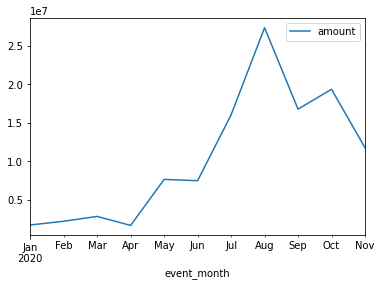

In [35]:
data.groupby(by='event_month',as_index=True).agg({'amount':sum}).plot(kind='line')

In [33]:
!pip install chart_studio

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11448 sha256=e371471a31bc869d6a8b3f82d6854f26052e749b140dfdc6fe07d7087541a7e0
  Stored in directory: c:\users\administrator\appdata\local\pip\cache\wheels\d5\35\56\157511efff72add938447610537ee2a4413b24b41d8f0ca6b9
Successfully built retrying


In [36]:
# 客单价
round(data['amount'].sum() / data['user_id'].nunique(),0)

1240.0

In [37]:
# 笔单价
round(data['amount'].sum() / data['order_id'].nunique(), 0)

296.0

In [38]:
# 先划分一下年龄
data['age_cut'] = pd.cut(data['age'],bins=[data.age.min(),20,30,40,data.age.max()],labels=['16-20','20-30','30-40','40-50'])
data[['age','age_cut']]

,age,age_cut
0,24.0,20-30
1,38.0,30-40
2,32.0,30-40
3,20.0,16-20
4,21.0,20-30
...,...,...
535060,21.0,20-30
535061,21.0,20-30
535062,19.0,16-20
535063,19.0,16-20


In [46]:
# data.groupby(by=data['age_cut']).agg(age非重复计数=('user_id','nunique')).reset_index()
# data.plot(kind='pie',labels='age_cut',values='age非重复计数', subplots=True)


ValueError: Cannot setitem on a Categorical with a new category, set the categories first

In [47]:
a=data.groupby(by=data['age_cut'],as_index=False).agg({'order_id':len,'amount':sum})
a

,age_cut,order_id,amount
0,16-20,60029,13026310.38
1,20-30,151584,33014189.70
2,30-40,148356,32000156.14
3,40-50,160698,33965002.86


In [48]:
import plotly.offline as py
import plotly.graph_objs as go
pyplt=py.offline.plot
py.init_notebook_mode(connected=True)

fig={
    "data":[
        {
            "values":a['order_id'],
            "labels":a['age_cut'],
            'domain':{'x':[0,0.8],'y':[0,0.6]},
            'name':"不同年龄段的订单占比",
            'hoverinfo':"label+percent+name",
            'hole':.3,
            'type':"pie"
        },
        {
            'values':a['amount'],
            'labels':a['age_cut'],
            'domain':{'x':[.6,1],'y':[0,.6]},
            'name':"不同年龄段的销售额占比",
            'hoverinfo':'label+percent+name',
            'hole':.3,
            'type':'pie'
        }
    ],
    'layout':{
        'title':'不同年龄段订单/销售额占比分布图',
        'annotations':[
            {
            'font':{'size':18},
            'showarrow':False,
            'text':'订单占比',
            'x':0.4,
            'y':0.255
        },
            {
                'font':{'size':18},
                'showarrow':False,
                'text':'销售额占比',
                'x':0.86,
                'y':0.255

            }
        ]
    }
}
py.iplot(fig)

In [52]:
# data.groupby(by='sex',as_index=False).agg({'age':len}).iplot(kind='pie',labels='sex',values='age')

In [53]:
b=data.groupby(by=data['sex'],as_index=False).agg({'order_id':len,'amount':sum})
b

,sex,order_id,amount
0,女,265017,57108456.57
1,男,270048,57878179.31


In [54]:
fig={
    "data":[
        {
            "values":b['order_id'],
            "labels":b['sex'],
            'domain':{'x':[0,0.8],'y':[0,0.6]},
            'name':"不同性别的订单占比",
            'hoverinfo':"label+percent+name",
            'hole':.3,
            'type':"pie"
        },
        {
            'values':b['amount'],
            'labels':b['sex'],
            'domain':{'x':[.6,1],'y':[0,.6]},
            'name':"不同性别的销售额占比",
            'hoverinfo':'label+percent+name',
            'hole':.3,
            'type':'pie'
        }
    ],
    'layout':{
        'title':'不同性别订单/销售额占比分布图',
        'annotations':[
            {
            'font':{'size':18},
            'showarrow':False,
            'text':'订单占比',
            'x':0.4,
            'y':0.255
        },
            {
                'font':{'size':18},
                'showarrow':False,
                'text':'销售额占比',
                'x':0.86,
                'y':0.255

            }
        ]
    }
}
py.iplot(fig)